In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.shape

(19820, 18)

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [4]:
X = df['max_power'].values

Y = df['selling_price'].values

In [5]:
X.shape

(19820,)

In [6]:
Y.shape

(19820,)

In [8]:
def hypothesis(x, weights):
    '''
    x : real value input (max-power)
    weights : list of [wo, w1]
    '''
    y_hat = weights[0] + weights[1]*x
    
    return y_hat

In [9]:
# 2.3
hypothesis(2.3, [5, 0.8])

6.84

In [10]:
def error(X, Y, weights):
    '''
    X: input n data points
    Y: target data 
    weights :  list of [wo, w1]
    '''
    
    n = len(X)
    err = 0
    
    for i in range(n):
        y_hat_i = hypothesis(X[i], weights)
        err += (Y[i] - y_hat_i)**2
        
    return err/n

In [16]:
def gradient(X, Y, weights):

    n = len(X)
    grad = np.zeros((2, ))
    
    for i in range(n):
        y_hat_i = hypothesis(X[i], weights)
        grad[0] += (y_hat_i - Y[i])
        grad[1] += (y_hat_i - Y[i])*X[i]
    
    return 2*grad/n

In [43]:
def gradient_descent(X, Y, max_itr = 100, learning_rate = 0.1):
    # step 1 : init() randomly
    
    weights = np.random.rand(2)
    error_list = []
    
    # step 2: repeate 100 times
    for i in range(max_itr):
        e = error(X, Y, weights)
        error_list.append(e)
        
        grad = gradient(X, Y, weights)
        weights[0] = weights[0] - learning_rate*grad[0]
        weights[1] = weights[1] - learning_rate*grad[1]
    
    return weights.round(3), error_list

In [44]:
opt_weights, error_list = gradient_descent(X, Y)

In [45]:
opt_weights

array([0.  , 0.77])

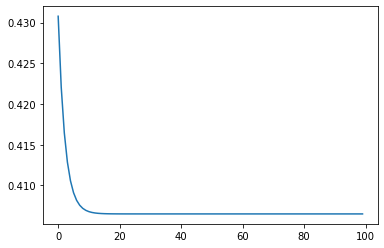

In [46]:
plt.plot(error_list);

In [55]:
# predict for 4.5
hypothesis(4.5, opt_weights)

3.465